In [80]:
import pandas as pd
import pandas as pd
import geopandas as gpd

In [81]:
df = pd.read_csv('data.csv')
df = df[['country', 'legatumRank2020']]
df.to_csv('health_care.csv', index = False)

In [82]:
gdf = gpd.read_file('countries.geojson')
gdf = gdf.rename(columns={'ADMIN': 'country'})
gdf

,country,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."
...,...,...,...,...
250,Samoa,WSM,WS,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8..."


In [83]:
df = pd.read_csv('file.csv')
df

,Unnamed: 0,iso_code,continent,country,total_cases,total_deaths,median_age,population,area,Density,netmigraration,morality,GDP
0,0,AFG,Asia,Afghanistan,52330.0,2189.0,18.6,41128772.0,647500,"48,0","23,06","163,07",700.0
1,1,ALB,Europe,Albania,57146.0,1170.0,38.0,2842318.0,28748,"124,6","-4,93","21,52",4500.0
2,2,DZA,Africa,Algeria,99311.0,2751.0,29.1,44903228.0,2381740,"13,8","-0,39",31,6000.0
3,3,ASM,Oceania,American Samoa,NaN,NaN,NaN,44295.0,199,"290,4","-20,71","9,27",8000.0
4,4,AND,Europe,Andorra,7983.0,84.0,NaN,79843.0,468,"152,1","6,6","4,05",19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,237,YEM,Asia,Yemen,2100.0,611.0,20.3,33696612.0,527970,"40,6",0,"61,5",800.0
196,238,ZMB,Africa,Zambia,20462.0,386.0,17.7,20017670.0,752614,"15,3",0,"88,29",800.0
197,239,ZWE,Africa,Zimbabwe,13625.0,360.0,19.6,16320539.0,390580,"31,3",0,"67,69",1900.0
198,240,COD,Africa,Democratic Republic of the Congo,17657.0,591.0,17.0,99010216.0,2345410,"26,7",0,"94,69",700.0


In [84]:

country_ids = df['country'].unique()
final_gdf = gdf[gdf['country'].isin(country_ids)]
final_gdf = final_gdf.reset_index(drop=True)
final_gdf = final_gdf.drop('ISO_A2', axis=1)
final_gdf = final_gdf.drop('ISO_A3', axis=1)

final_gdf

,country,geometry
0,Aruba,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."
...,...,...
188,Samoa,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
189,Yemen,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
190,South Africa,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
191,Zambia,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8..."


In [95]:
health_df = pd.read_csv('health_care.csv')

In [97]:
merged_gdf = final_gdf.merge(df, left_on='country', right_on='country', how='inner')
merged_gdf = merged_gdf.drop('Unnamed: 0', axis=1)
perc = []
for i in range(0, len(merged_gdf["continent"])):
    num = (merged_gdf["total_deaths"][i] / merged_gdf["population"][i]) * 100
    perc.append(f"{num}%")
merged_gdf["percentage"] = perc
merged_gdf = merged_gdf.merge(health_df, how='left', left_on='country', right_on='country')
merged_gdf.fillna(value={'column_with_missing_values': None}, inplace=True)
merged_gdf = merged_gdf.rename(columns={'legatumRank2020': 'health_care'})
# print(set(merged_gdf['country'])-set(health_df['country']))
merged_gdf

,country,geometry,iso_code,continent,total_cases,total_deaths,median_age,population,area,Density,netmigraration,morality,GDP,percentage,health_care
0,Aruba,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...",ABW,North America,5373.0,49.0,41.2,106459.0,193,"372,5",0,"5,89",28000.0,0.04602710902788867%,NaN
1,Afghanistan,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...",AFG,Asia,52330.0,2189.0,18.6,41128772.0,647500,"48,0","23,06","163,07",700.0,0.005322308188535267%,162.0
2,Angola,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",AGO,Africa,17433.0,405.0,16.8,35588996.0,1246700,"9,7",0,"191,19",1900.0,0.0011379922041071346%,156.0
3,Anguilla,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",AIA,North America,13.0,NaN,NaN,15877.0,102,"132,1","10,76","21,03",8600.0,nan%,NaN
4,Albania,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...",ALB,Europe,57146.0,1170.0,38.0,2842318.0,28748,"124,6","-4,93","21,52",4500.0,0.04116358549606342%,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",WSM,Oceania,1.0,NaN,22.0,222390.0,2944,"60,1","-11,7","27,71",5600.0,nan%,NaN
189,Yemen,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",YEM,Asia,2100.0,611.0,20.3,33696612.0,527970,"40,6",0,"61,5",800.0,0.00181323867218461%,165.0
190,South Africa,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",ZAF,Africa,1039161.0,28033.0,27.3,59893884.0,1219912,"36,2","-0,29","61,81",10700.0,0.04680444500810801%,87.0
191,Zambia,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8...",ZMB,Africa,20462.0,386.0,17.7,20017670.0,752614,"15,3",0,"88,29",800.0,0.0019282963501746208%,123.0


<AxesSubplot: >

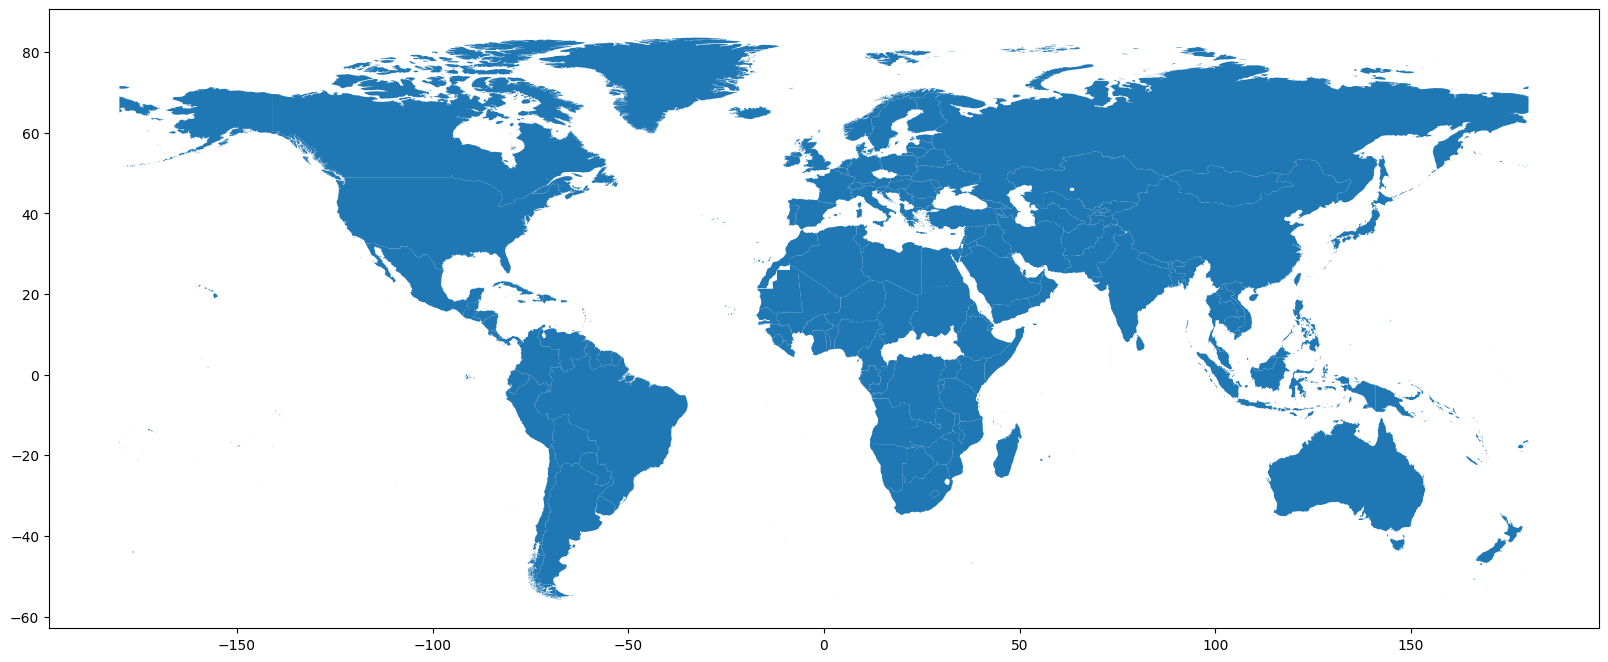

In [86]:
merged_gdf.plot(figsize=(20, 10))